#***Carlos Gross-Martinez***
#***Deep Learning***
#***HW2 Coding Answers***

In [80]:
#installing tensorflow
!pip install tensorflow

In [81]:
#Mounting drive with images

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#import libraries
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Activation, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

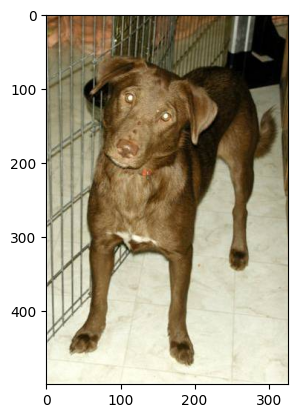

In [83]:
folder='/content/drive/MyDrive/Colab Notebooks/Deep Learning/dogvscat1000/'

# show one image
filename = folder + 'dog.' + '1' + '.jpg'
# load image pixels
image = imread(filename)
# plot raw pixel data
plt.imshow(image)

In [84]:
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
        # load image
    photo = load_img(folder + file, target_size=(32, 32),color_mode="rgb")  #"rgb" for color mode; "grayscale"
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(1000, 32, 32, 3) (1000,)


In [85]:
#split data set into testing and and training
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=.2, random_state=42)

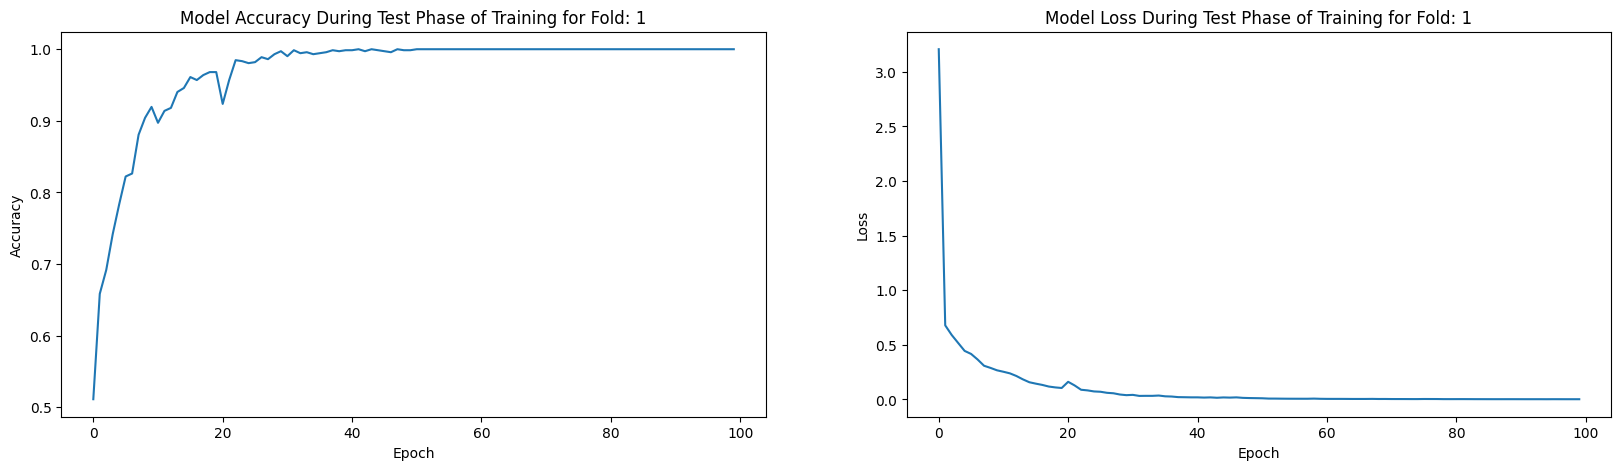

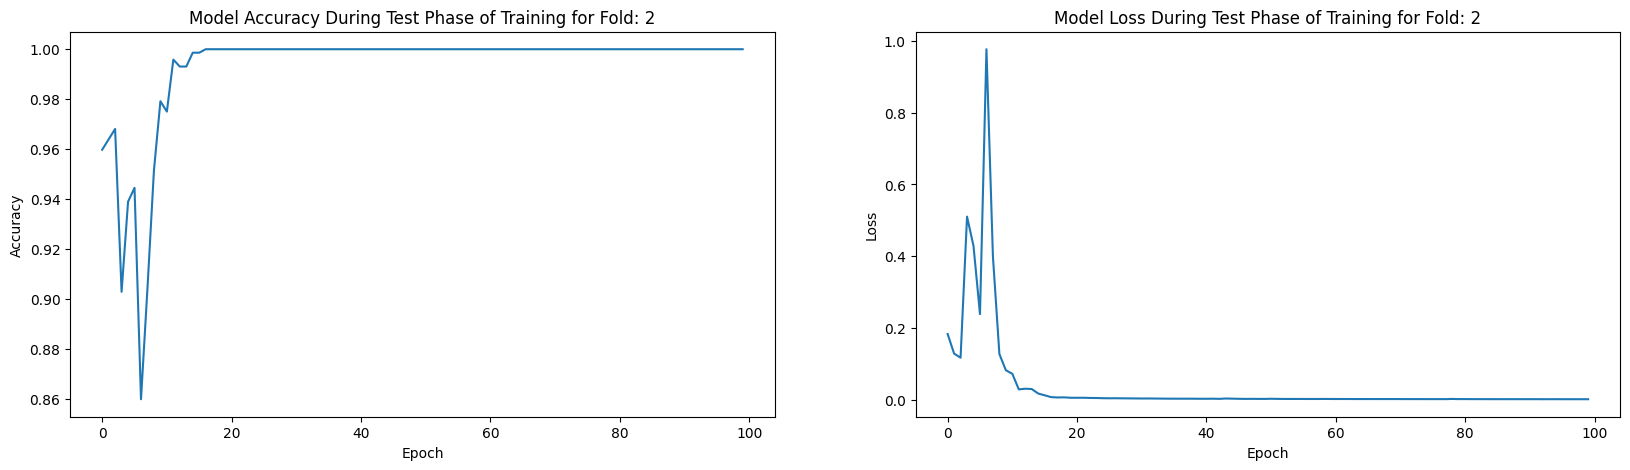

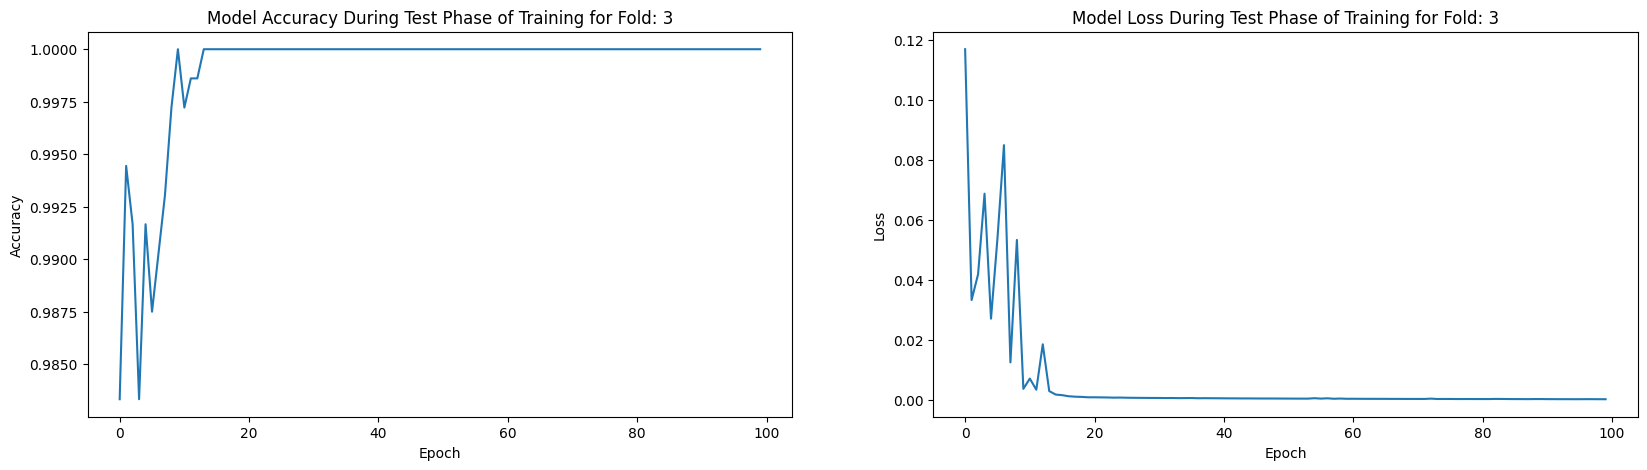

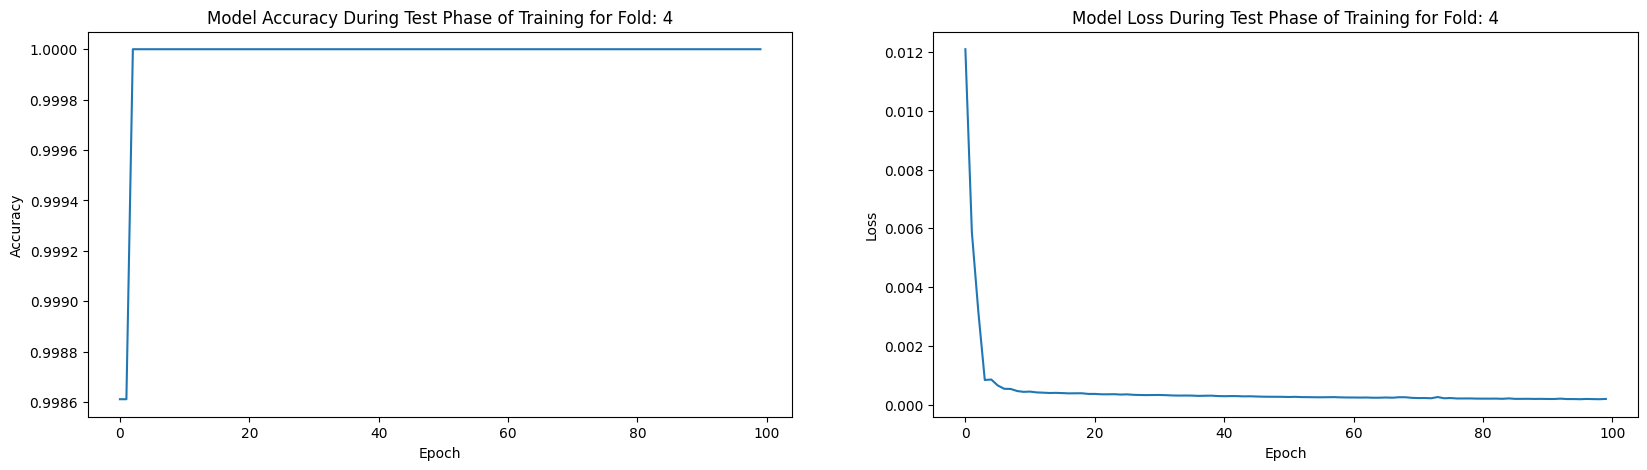

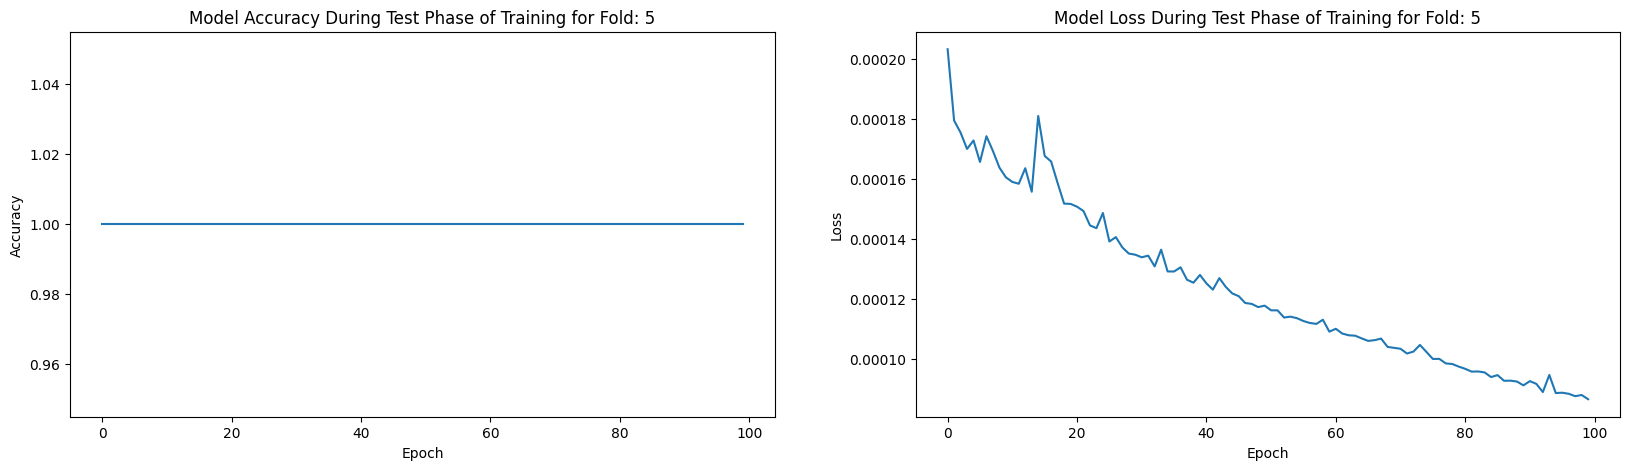

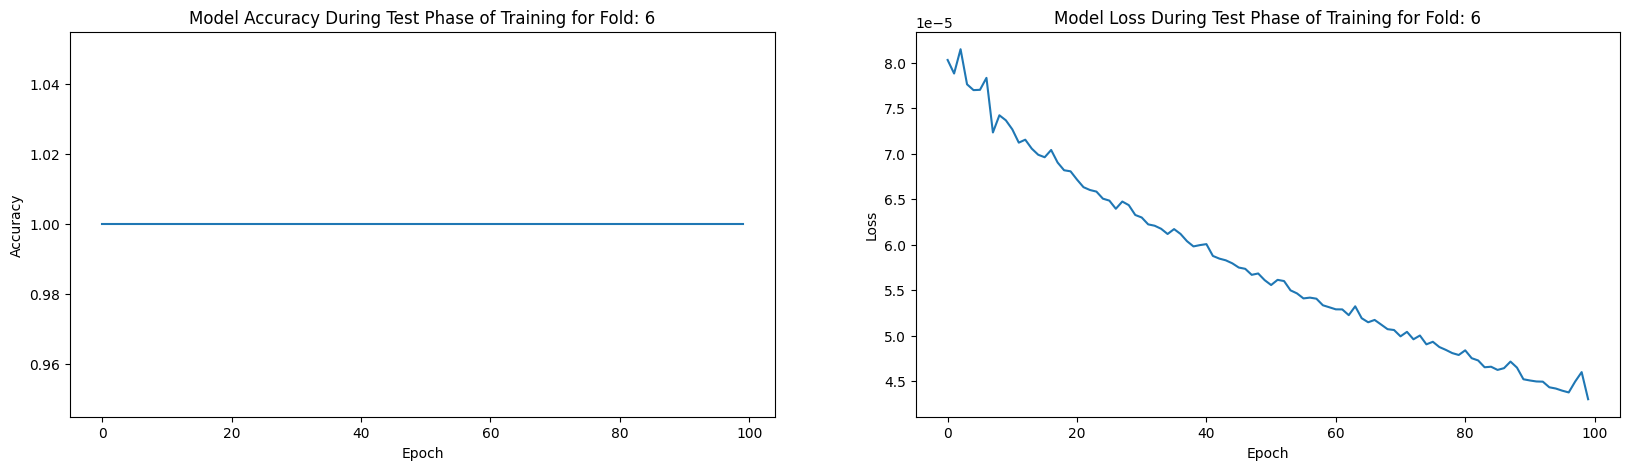

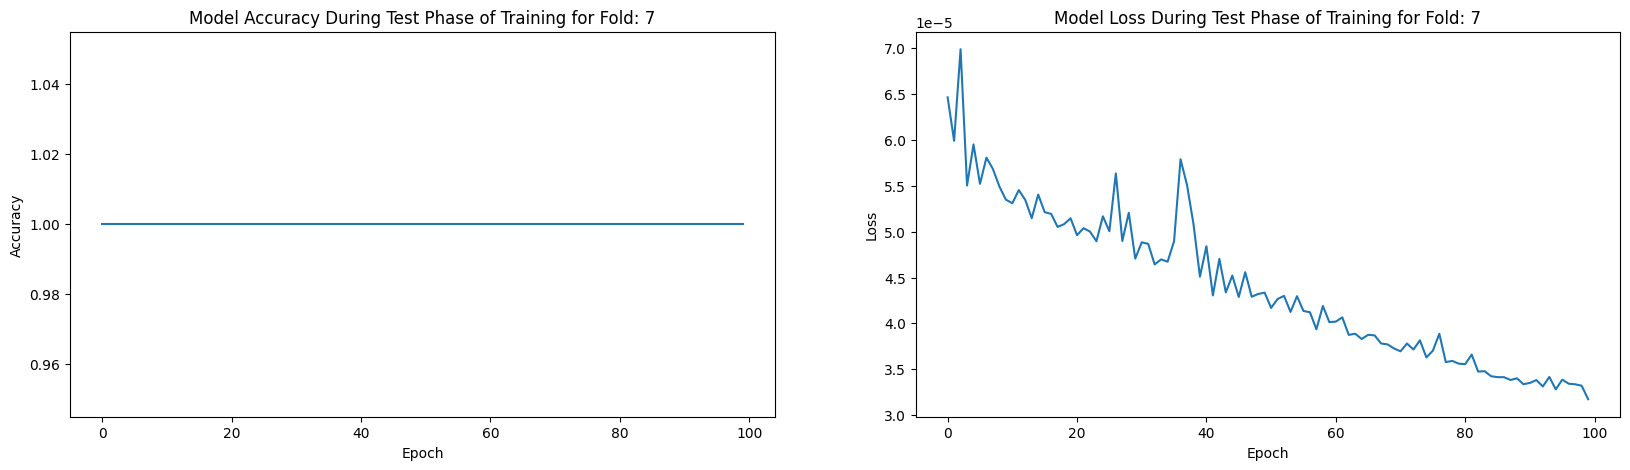

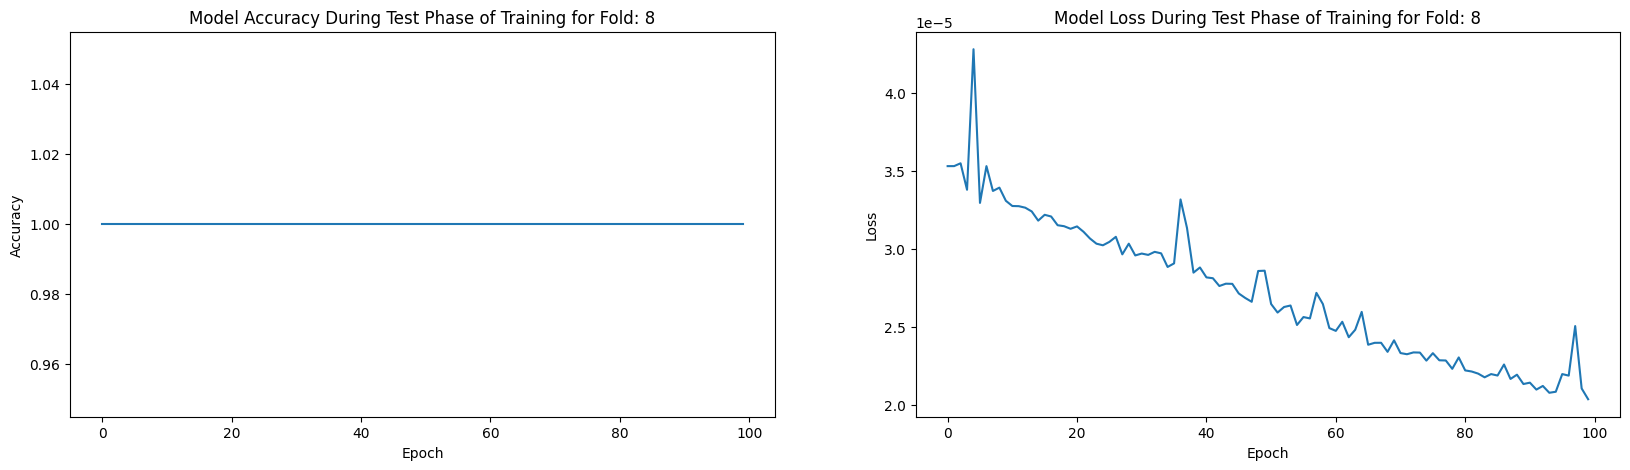

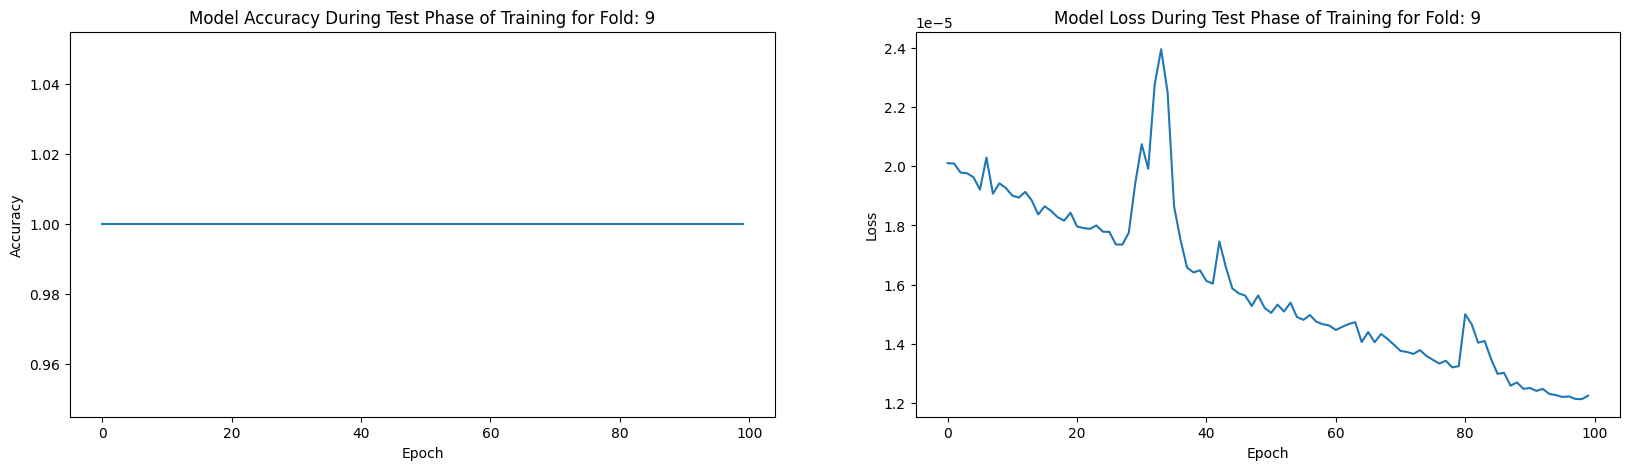

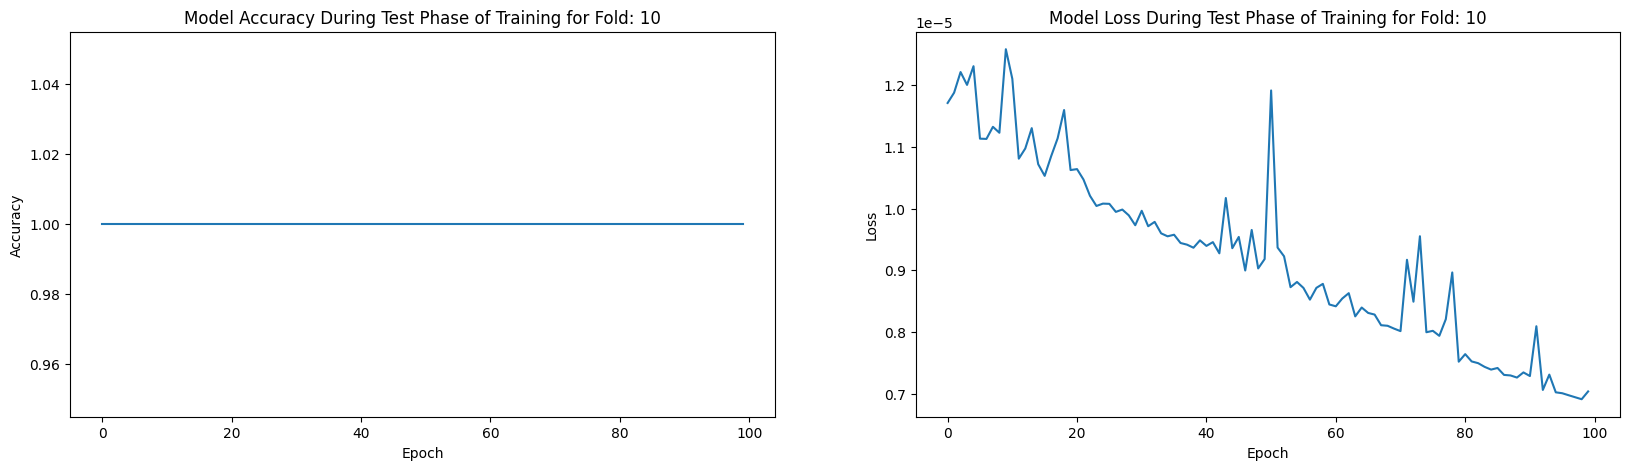



---------------------------------------------------
TRAINING OF MODEL COMPLETED. TESTING WITH TEST DATASET AND PLOTTING RESULTS
---------------------------------------------------




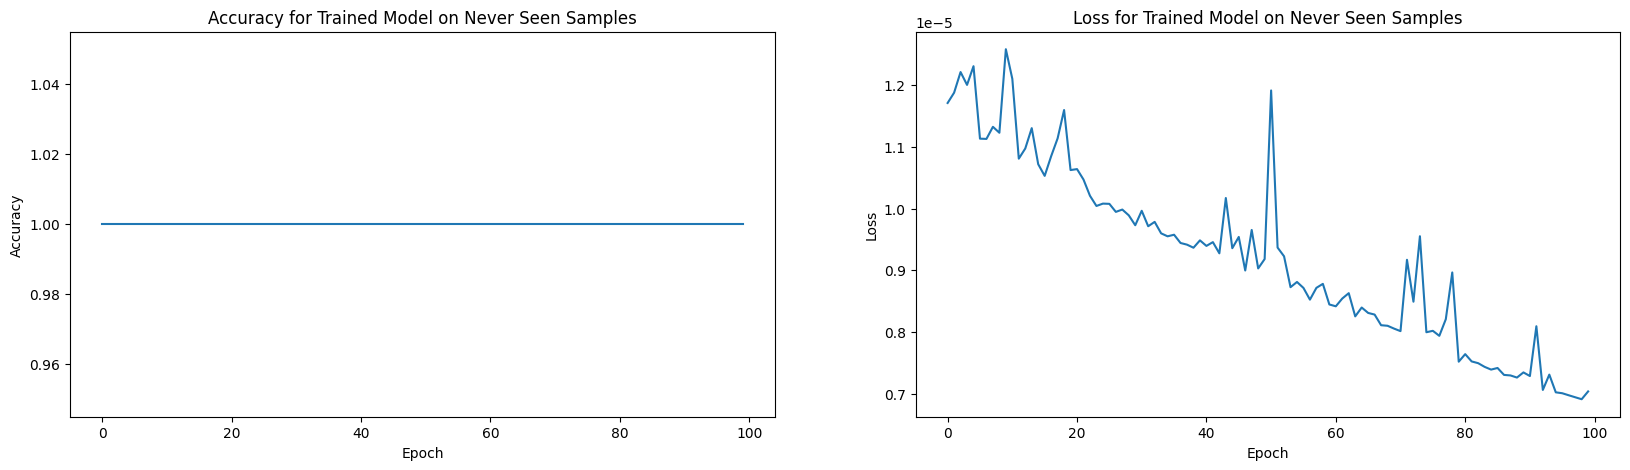

In [86]:
#9.3 Use 10-fold cross validation to split the 1000 images into training vs. test set. +
#Train neural networks using training set, and report their performance on the test set.

#variable to keep track of folds
fold_num = 1

#model declaration with 250 neurons in hidden layer and 2 neurons in output layer
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(250, activation='relu',name="Hidden"),
    keras.layers.Dense(2, name="Output"),
])

#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#difining num,ber of folds
kfold = KFold(n_splits=10, shuffle=True)

#training and testing model with 10 fold cross validation
for train_index, test_index in kfold.split(X_train, y_train):

  history=model.fit(X_train[train_index], y_train[train_index], epochs=100,verbose=0,batch_size=100)

  test_loss, test_acc = model.evaluate(X_train[test_index],  y_train[test_index], verbose=0)

  # summarize history for accuracy
  plt.figure(figsize = (20, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy During Test Phase of Training for Fold: ' + str(fold_num))
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

  # summarize history for loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.title('Model Loss During Test Phase of Training for Fold: ' + str(fold_num))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()

  fold_num += 1

print('\n\n---------------------------------------------------')
print('TRAINING OF MODEL COMPLETED. TESTING WITH TEST DATASET AND PLOTTING RESULTS')
print('---------------------------------------------------\n\n')

#evaluating trained model on new samples
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)

# summarize history for accuracy
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy for Trained Model on Never Seen Samples')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss for Trained Model on Never Seen Samples')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

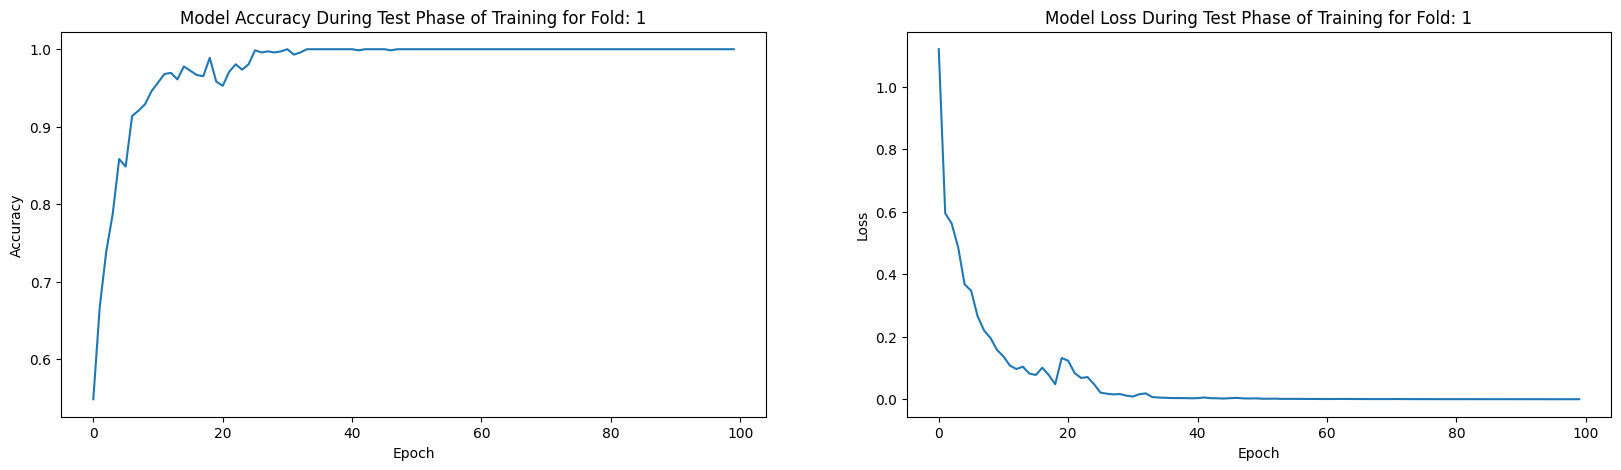

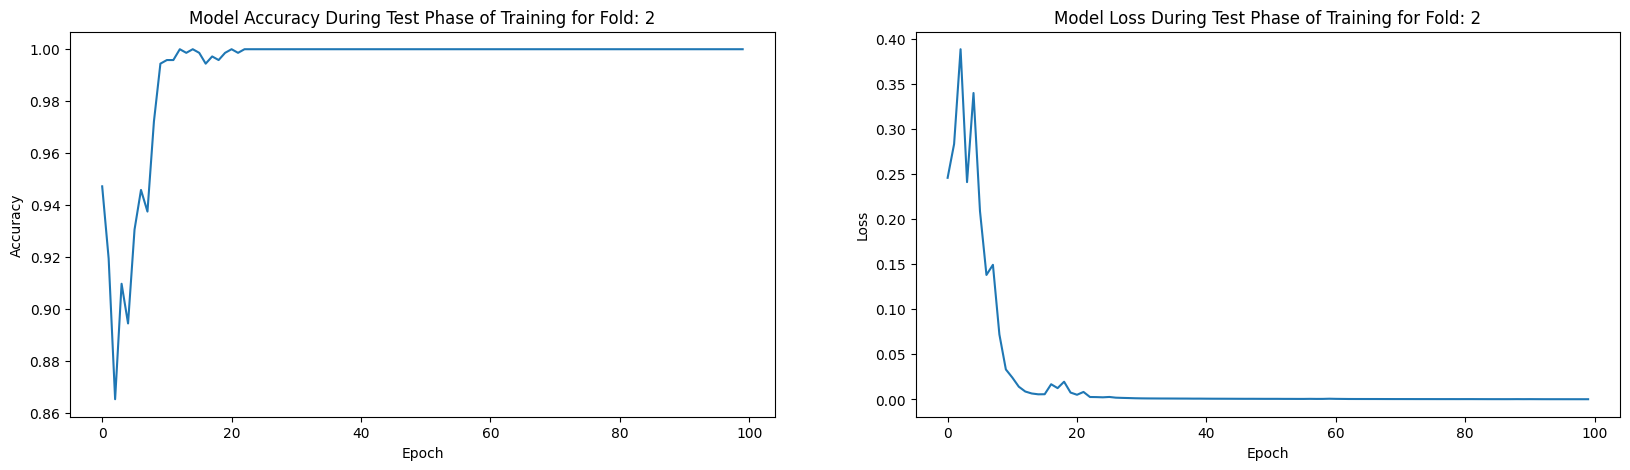

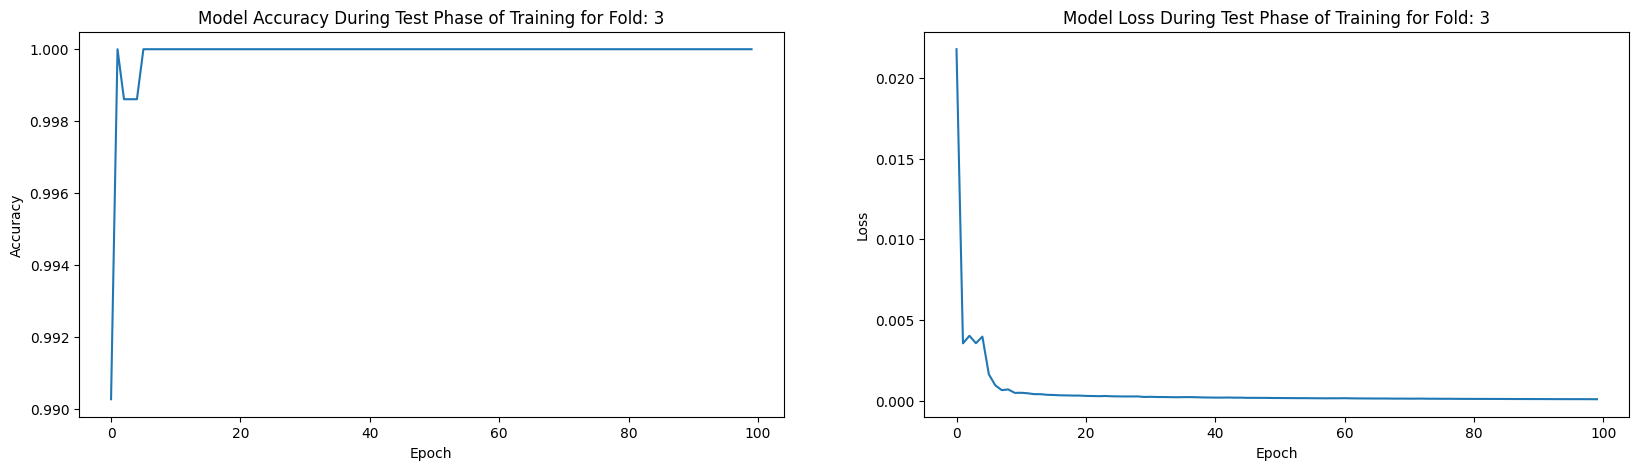

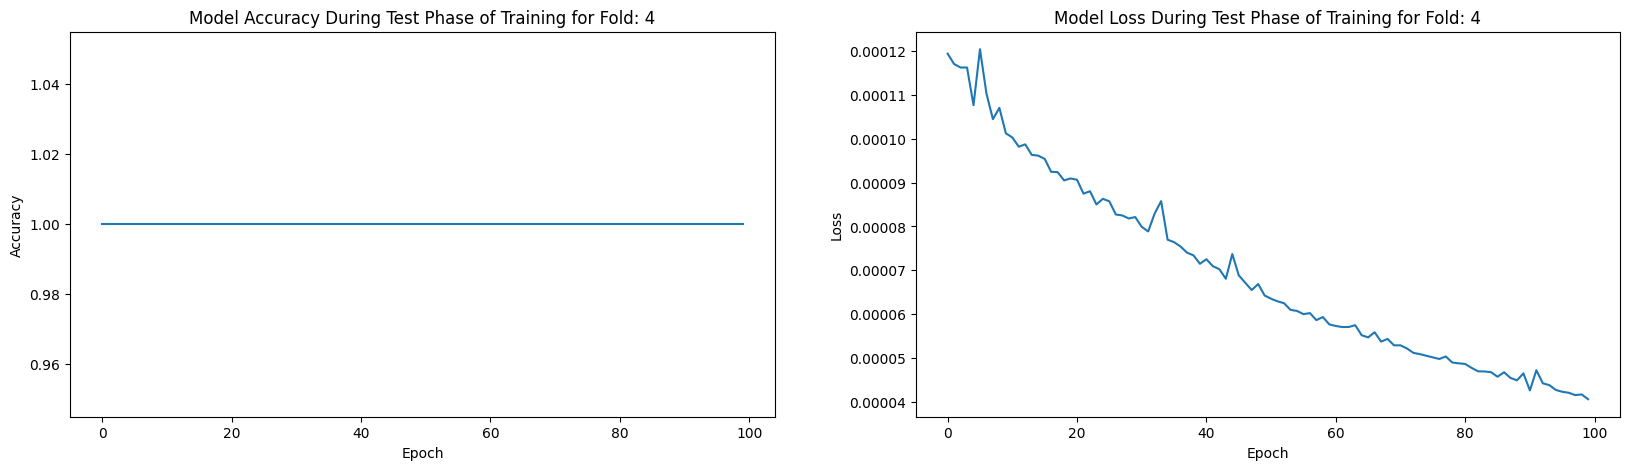

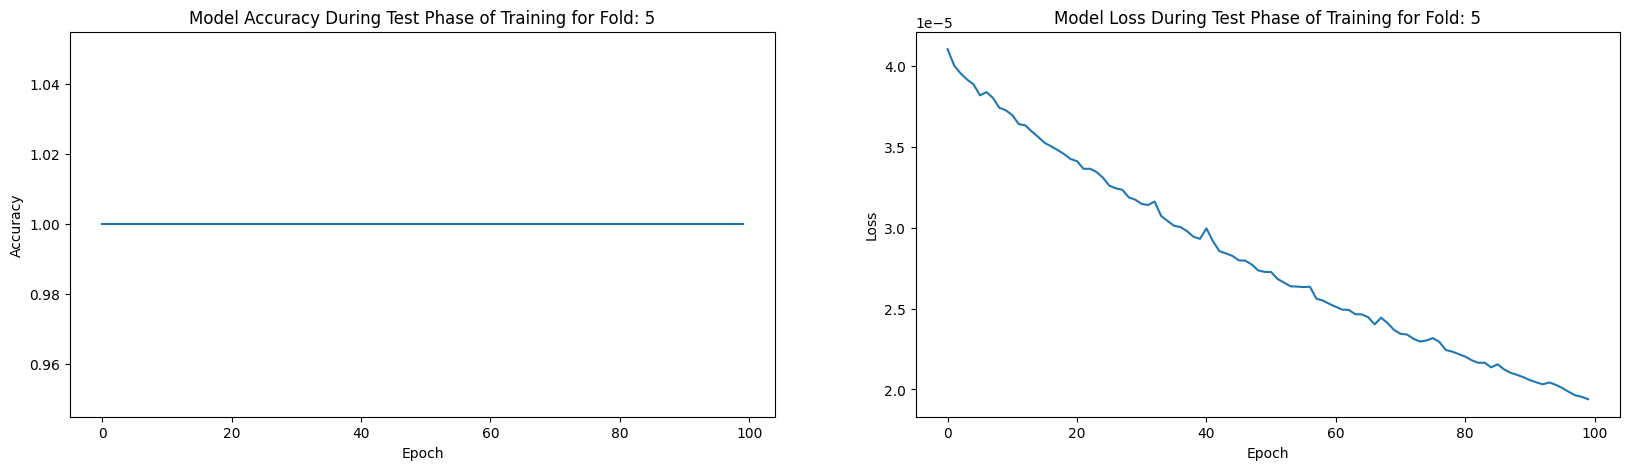

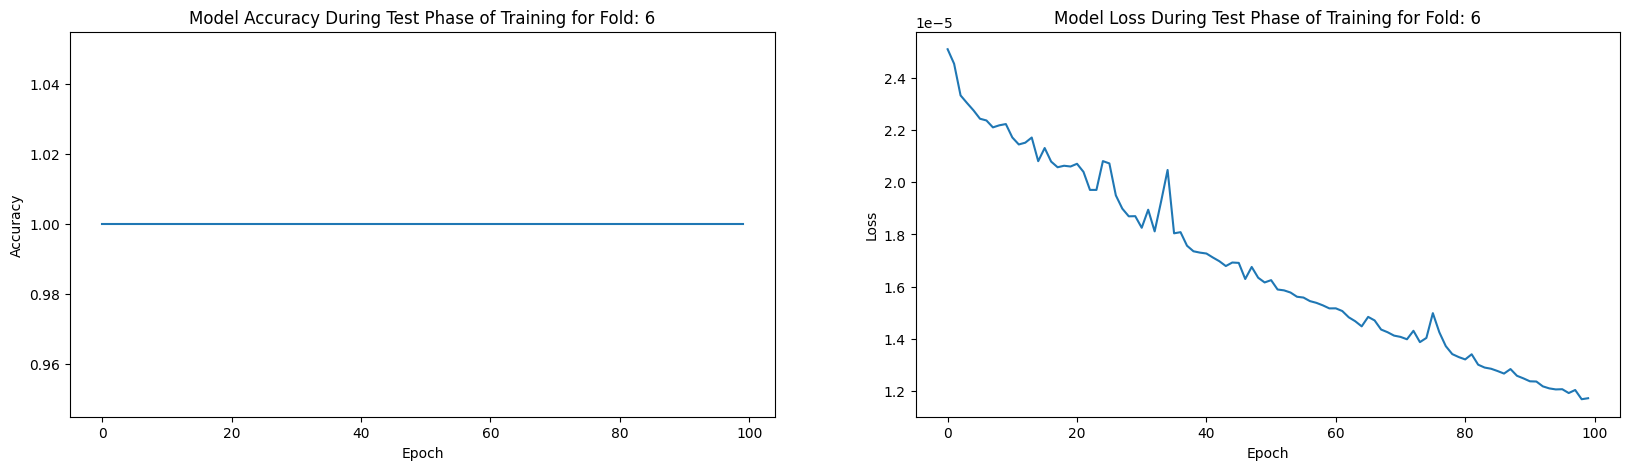

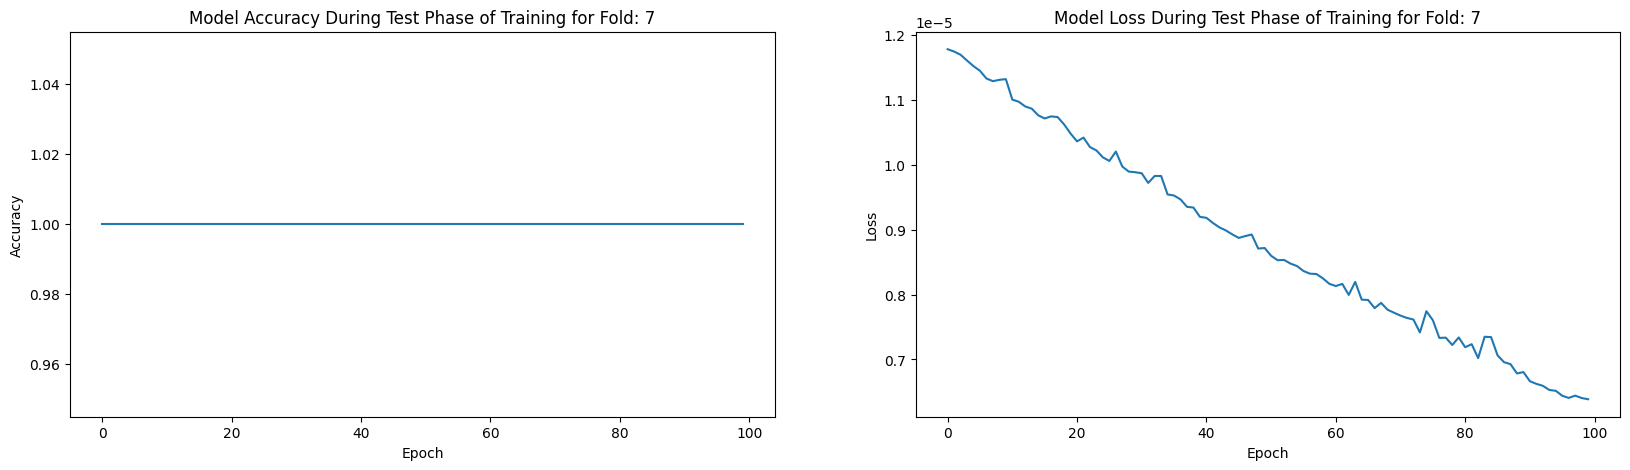

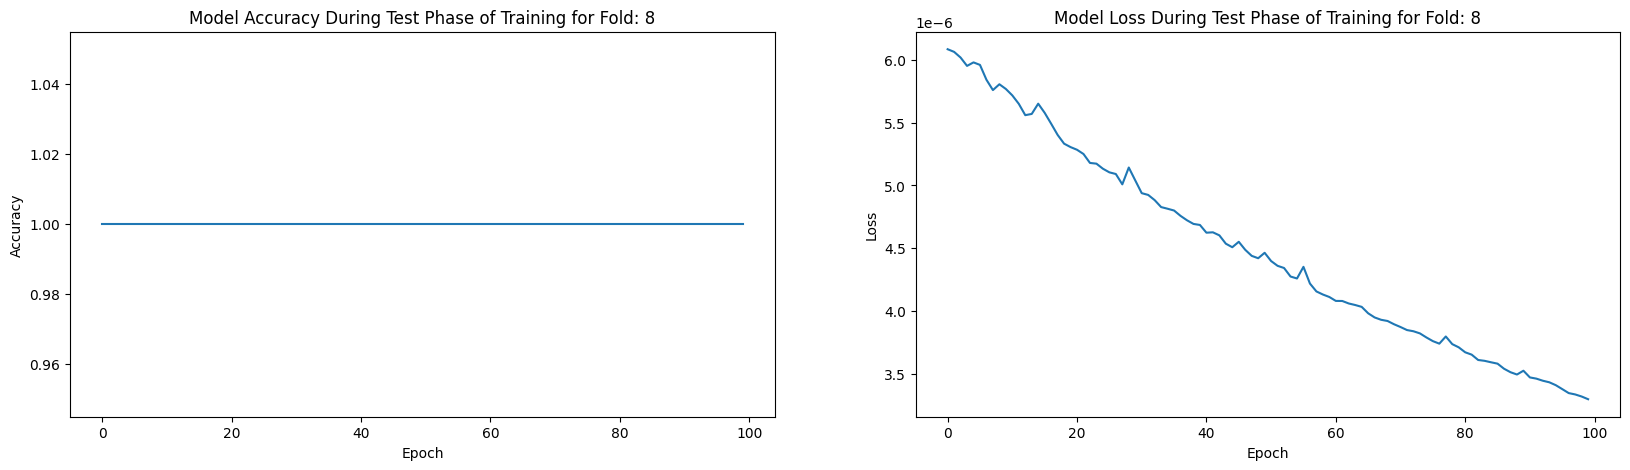

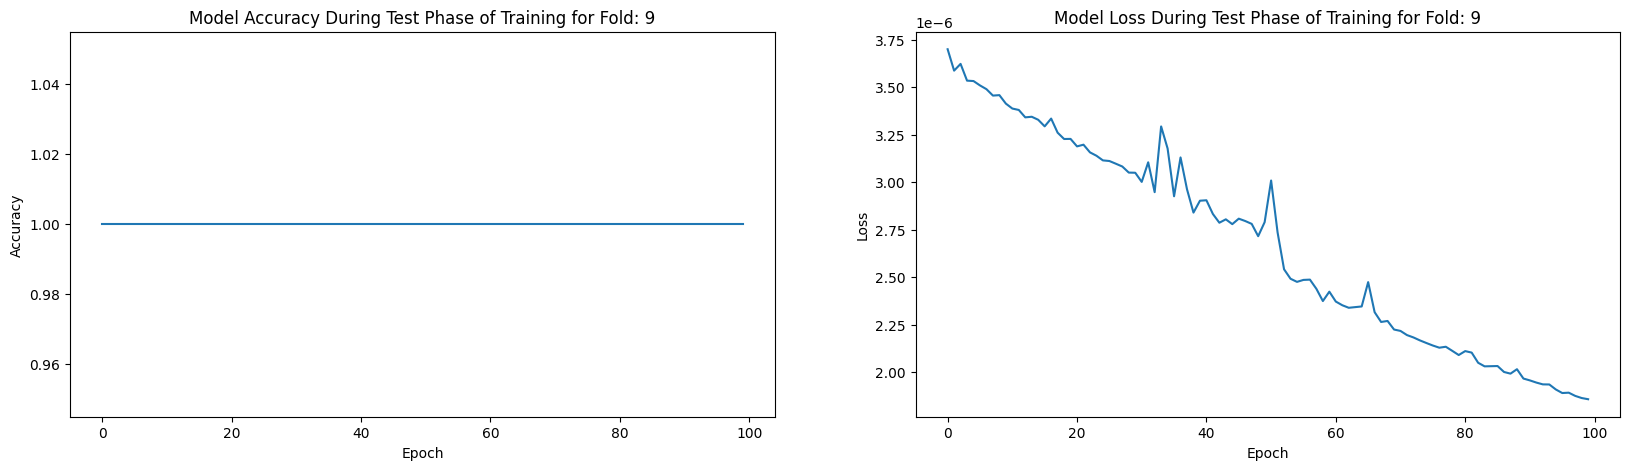

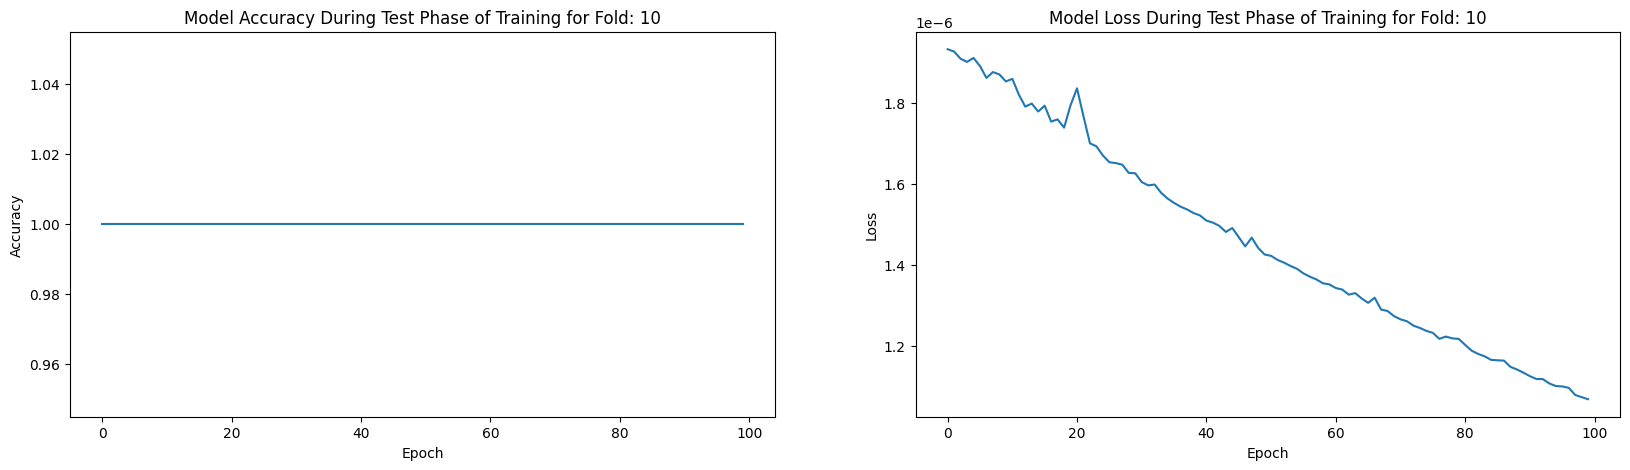



---------------------------------------------------
TRAINING OF MODEL COMPLETED. TESTING WITH TEST DATASET AND PLOTTING RESULTS
---------------------------------------------------




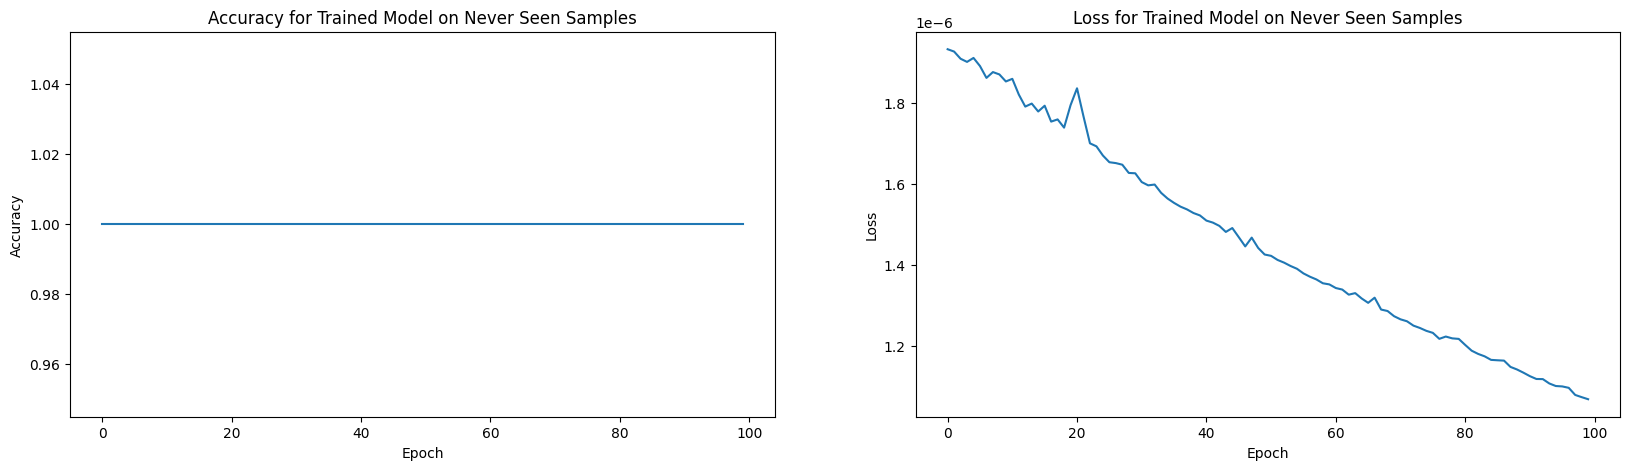

In [92]:
#9.4 Create a feedforward neural network with one or two hidden layers Train the network on the training set
#and report its performance on the test. Report at least one loss plot with respect to the number of epochs.
#Report 10-fold cross validation accuracy

#variable to keep track of folds
fold_num = 1

#model declaration with 150 neurons in hidden layer 1
#100 neurons in hidden layer 2 and 2 neurons in output layer
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(150, activation='relu',name="Hidden1"),
    keras.layers.Dense(100, activation='relu',name="Hidden2"),
    keras.layers.Dense(2, name="Output"),
])

#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#difining num,ber of folds
kfold = KFold(n_splits=10, shuffle=True)

#training and testing model with 10 fold cross validation
for train_index, test_index in kfold.split(X_train, y_train):

  history=model.fit(X_train[train_index], y_train[train_index], epochs=100,verbose=0,batch_size=100)

  test_loss, test_acc = model.evaluate(X_train[test_index],  y_train[test_index], verbose=0)

  # summarize history for accuracy
  plt.figure(figsize = (20, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy During Test Phase of Training for Fold: ' + str(fold_num))
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

  # summarize history for loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.title('Model Loss During Test Phase of Training for Fold: ' + str(fold_num))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()

  fold_num += 1

print('\n\n---------------------------------------------------')
print('TRAINING OF MODEL COMPLETED. TESTING WITH TEST DATASET AND PLOTTING RESULTS')
print('---------------------------------------------------\n\n')

#evaluating trained model on new samples
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)

# summarize history for accuracy
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy for Trained Model on Never Seen Samples')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss for Trained Model on Never Seen Samples')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

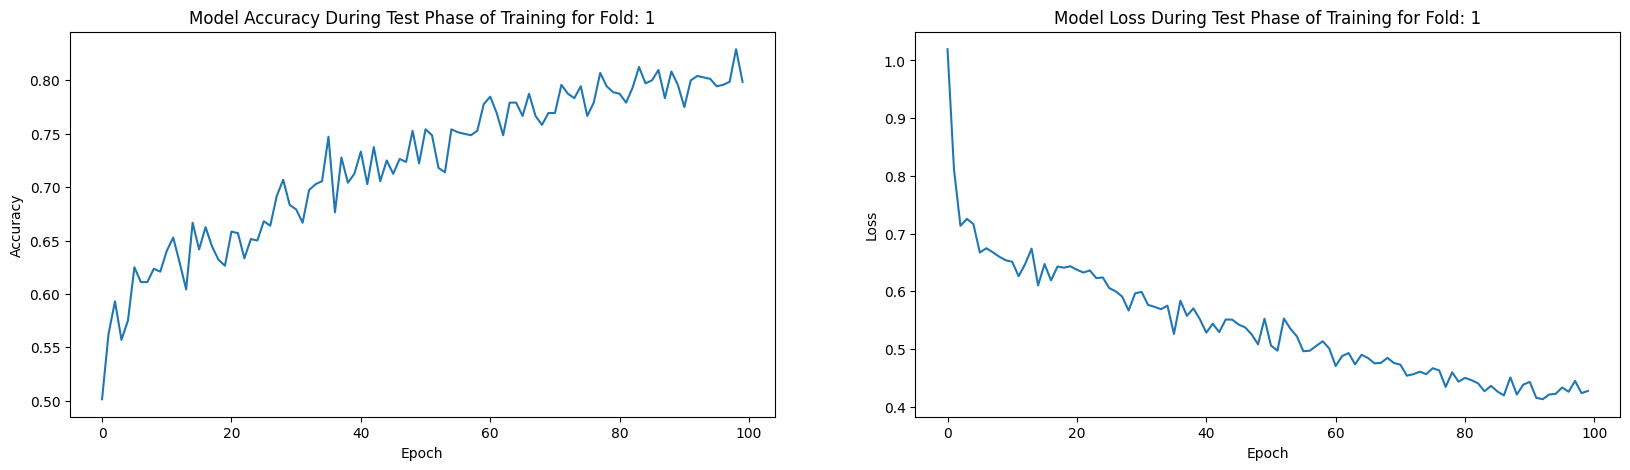

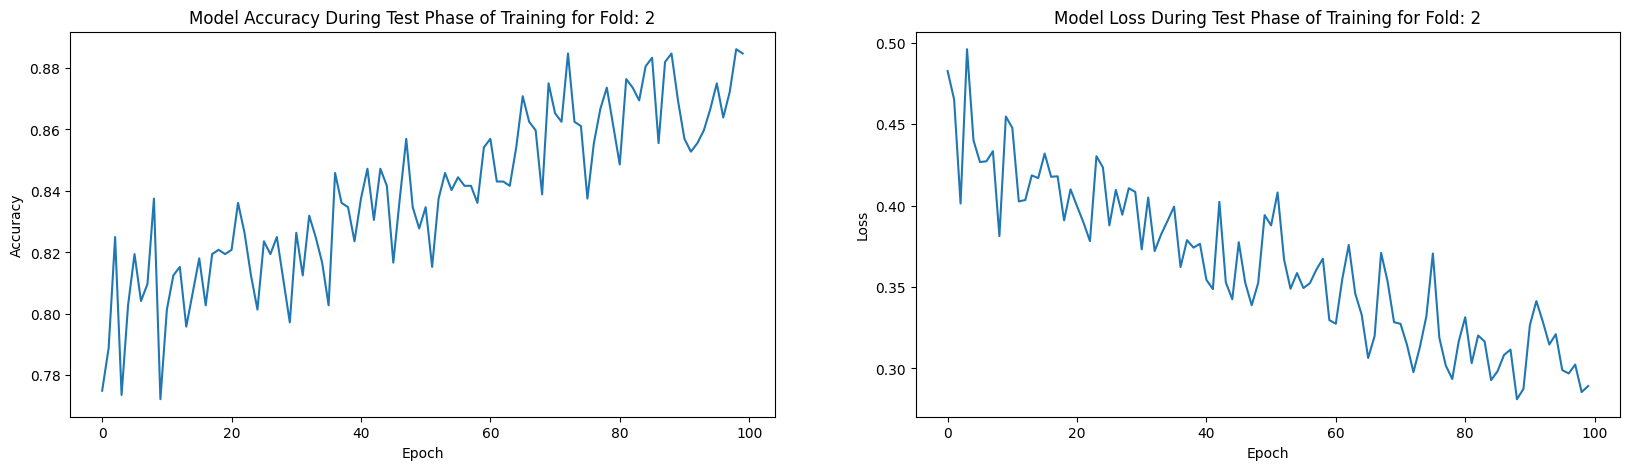

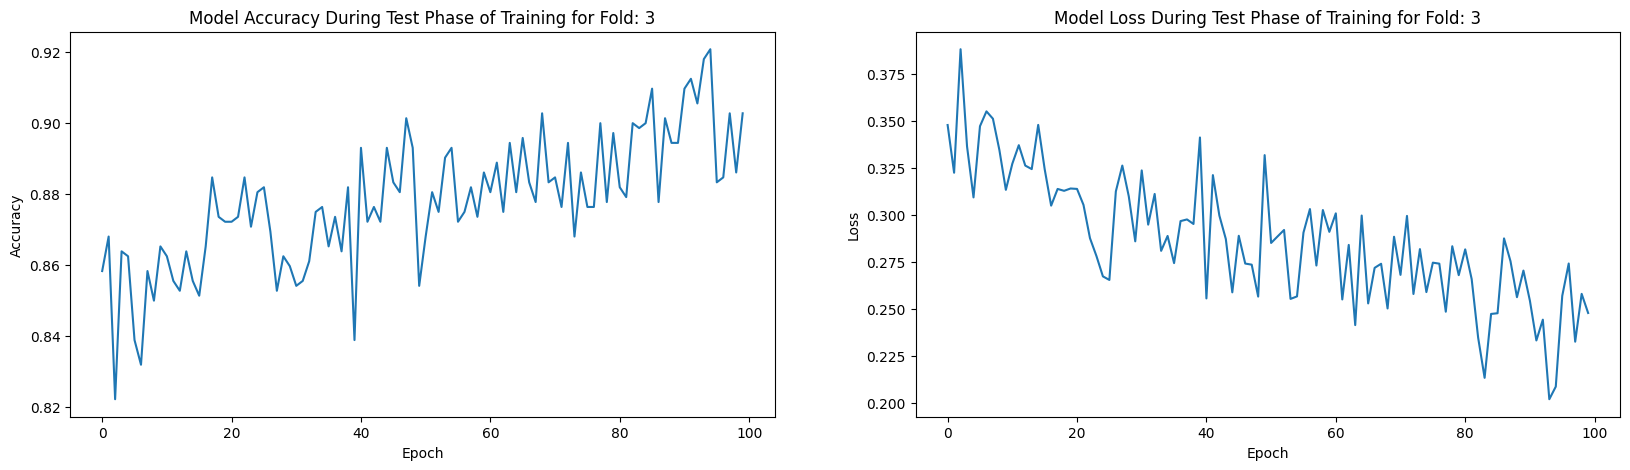

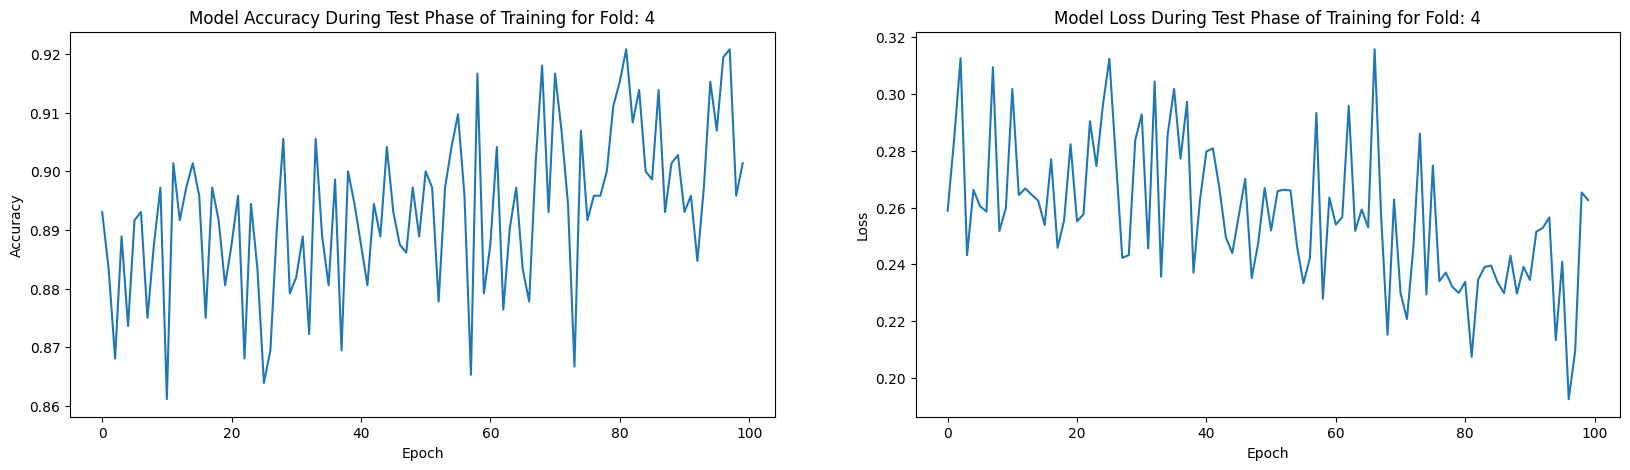

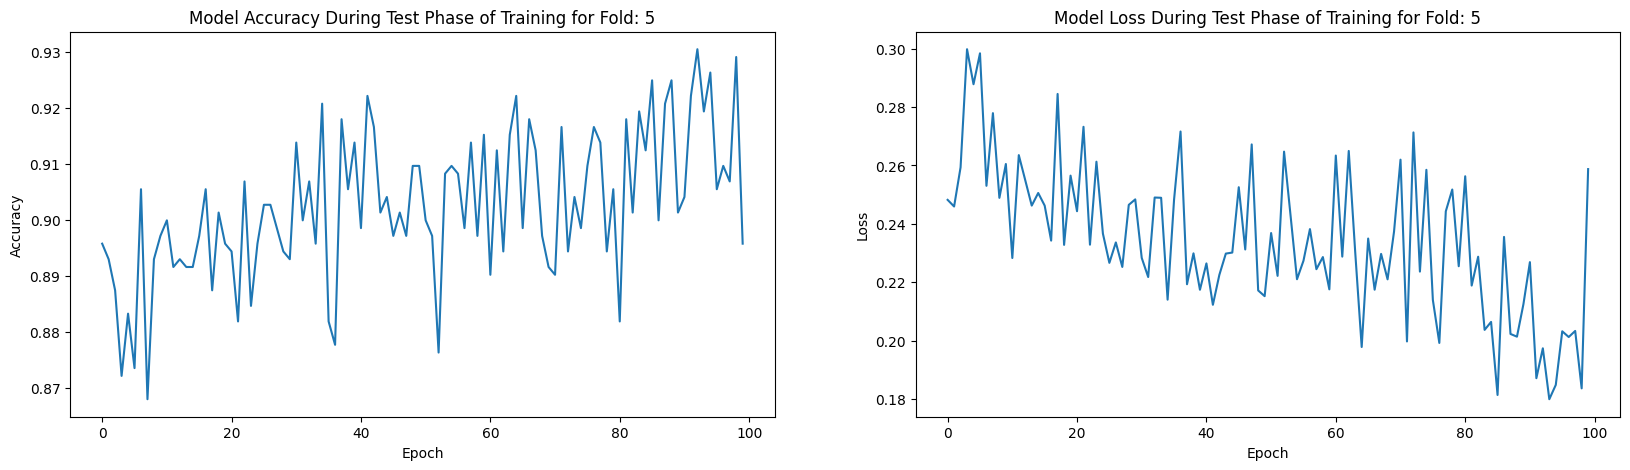

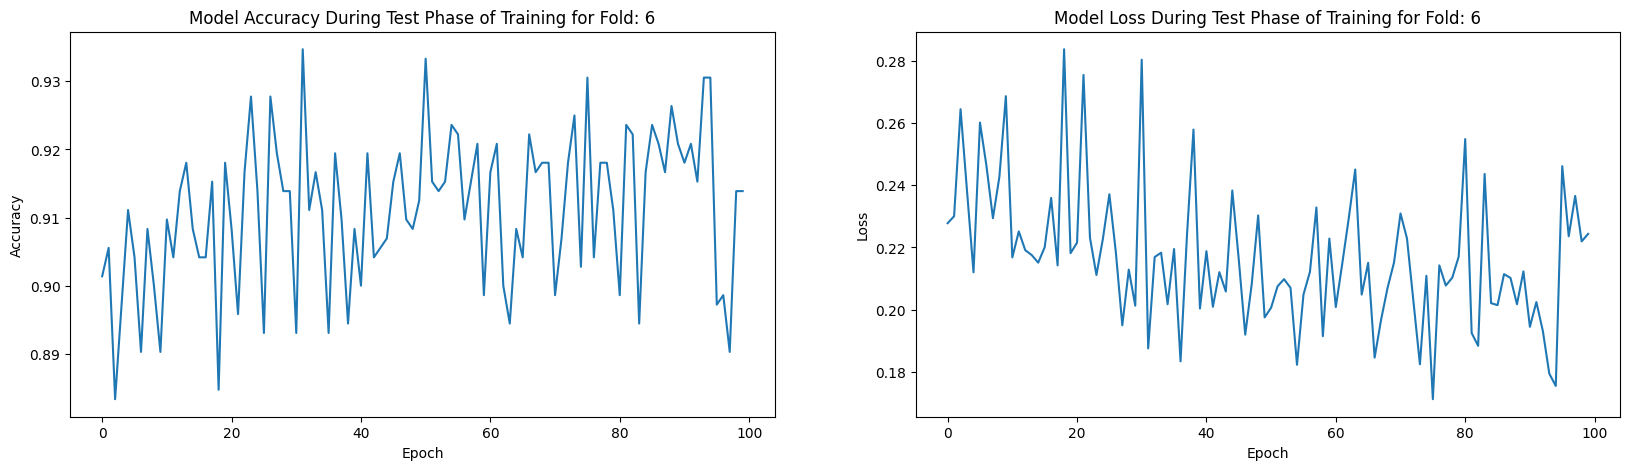

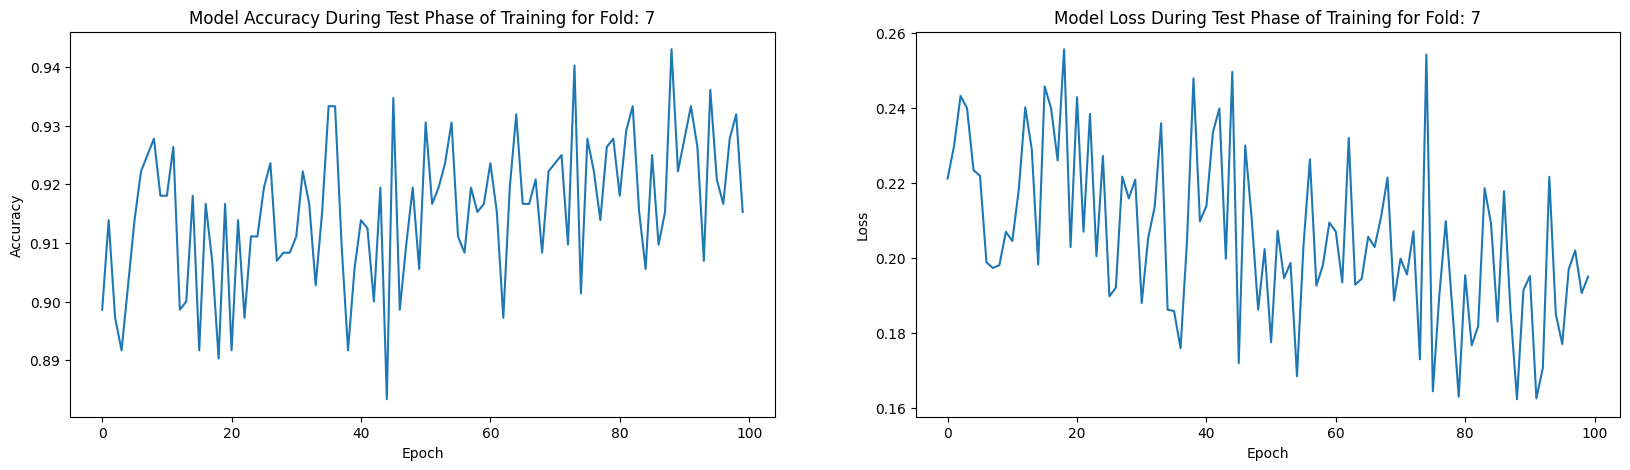

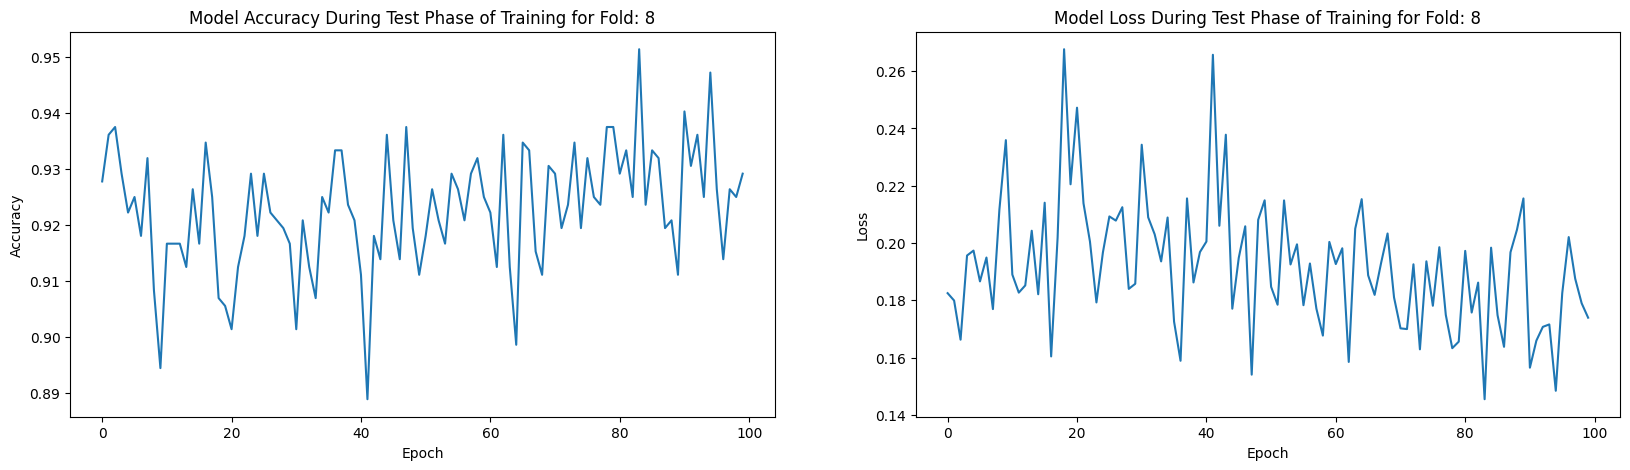

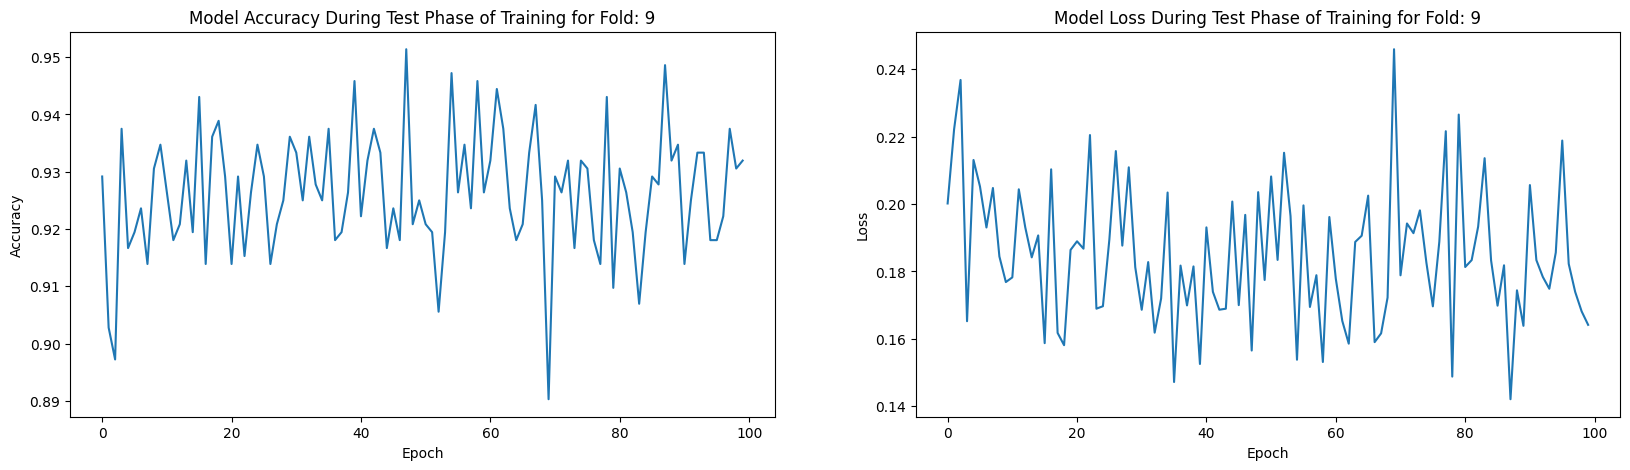

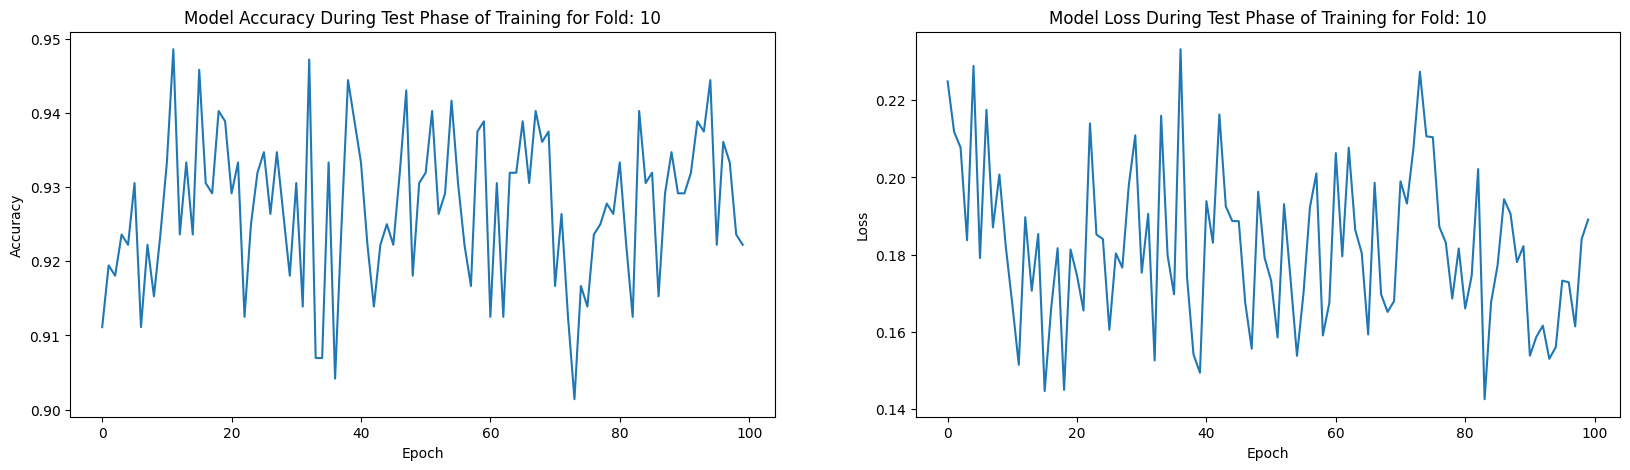



---------------------------------------------------
TRAINING OF MODEL COMPLETED. TESTING WITH TEST DATASET AND PLOTTING RESULTS
---------------------------------------------------




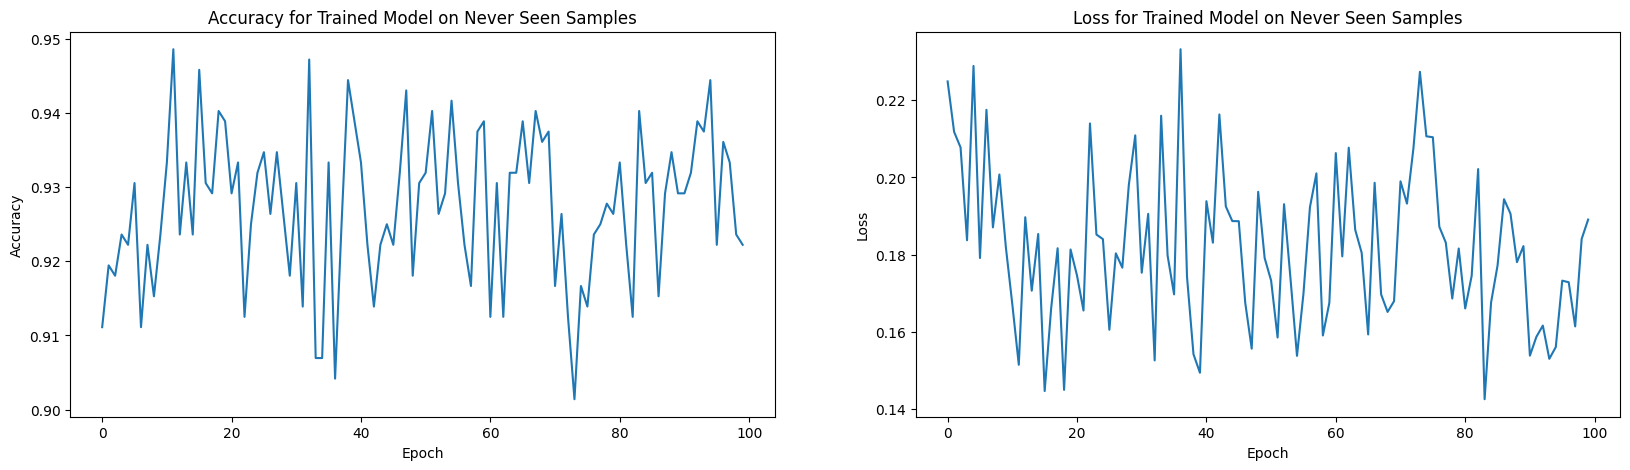

In [94]:
#9.5 For the same network structure created above, please change the network structure by adding batch normalization
#and/or dropout layer (at different layers). Report 10-fold cross validation performance of the network by adding
#batch normalization and dropout layer, respectively. Conclude batch normalization and drop-out impact on the neural
#network performance.

#variable to keep track of folds
fold_num = 1

#model declaration with 150 neurons in hidden layer 1
#100 neurons in hidden layer 2 and 2 neurons in output layer
#and adding dropout and batch normalization after each hidden layer
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Dropout(rate=0.7),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(150, activation='relu',name="Hidden1"),
    keras.layers.Dropout(rate=0.7),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu',name="Hidden2"),
    keras.layers.Dense(2, name="Output"),
])

#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#difining num,ber of folds
kfold = KFold(n_splits=10, shuffle=True)

#training and testing model with 10 fold cross validation
for train_index, test_index in kfold.split(X_train, y_train):

  history=model.fit(X_train[train_index], y_train[train_index], epochs=100,verbose=0,batch_size=100)

  test_loss, test_acc = model.evaluate(X_train[test_index],  y_train[test_index], verbose=0)

  # summarize history for accuracy
  plt.figure(figsize = (20, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy During Test Phase of Training for Fold: ' + str(fold_num))
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

  # summarize history for loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.title('Model Loss During Test Phase of Training for Fold: ' + str(fold_num))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()

  fold_num += 1

print('\n\n---------------------------------------------------')
print('TRAINING OF MODEL COMPLETED. TESTING WITH TEST DATASET AND PLOTTING RESULTS')
print('---------------------------------------------------\n\n')

#evaluating trained model on new samples
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)

# summarize history for accuracy
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy for Trained Model on Never Seen Samples')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss for Trained Model on Never Seen Samples')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#***Conclude batch normalization and drop-out impact on the neural network performance.***
***Based on the results it can be concluded that the model was able to maintain a high level of accuracy even after 70% of the neurons in each hidden layer were dropped. During the training phase, the accuracy was very low. However, as the trainnig progressed, the overall accuracy of the model greatly increased. When testing with the never seen test set, the accuracy was maintained in the 90 to 95 range which demostrated that the model is robust. By these observations, it can be concluded that adding the drop out layer and the normalization layer greatly helped the model to maintain a high level of accuracy and avoided over fitting. It is also important to note that during the training of the model, the accuracy increased after each fold. This leads me to believe if the number of epochs are increased in the model during the training phase, we might be able to increase the rebustness and overall accuracy of the model***